# pandas visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

lets take a look at the matplotlib's style package.

Matplotlib comes with a number of predefined styles, which we can choose from, to change the default look of our plots.

Because pandas is using matplotlib under the hood, this will change the default style of our pandas graphs as well.

In [3]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Let's use the seaborn-colorblind style, which will change the default colors of our plots to use a color palette that is more color vision deficiency friendly.

In [4]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

Let's make a DataFrame. First, we'll set the seed for the random number generator, which will allow us to reproduce the data.

Next, let's add three columns of random time series data.

We can generate the random data by cumulatively summing up random numbers.

numpi has a great function for this called cumsum, which cumulatively sums an array

Let's do this for three columns, A, B and C. And also offset the B column by + 20 and the C column by- 20. Using date_range, we can set the index to be everyday in 2017.

In [7]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638
...,...,...,...
2017-12-27,-17.039852,36.468465,-61.792064
2017-12-28,-16.366361,36.860543,-59.518959
2017-12-29,-16.780118,37.607936,-59.615350
2017-12-30,-16.104155,37.880671,-61.557482


<IPython.core.display.Javascript object>


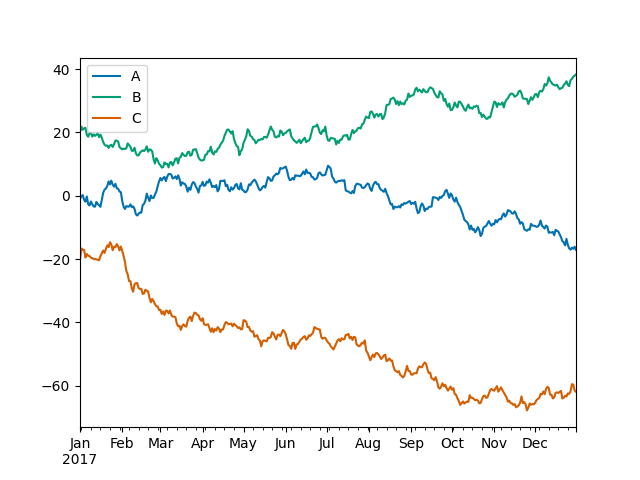

In [8]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


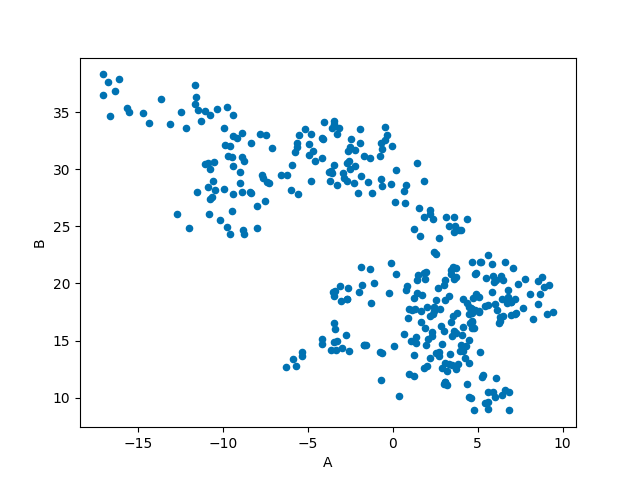

In [9]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the DataFrame.plot.kind methods instead of providing the kind keyword argument.

kind :

'line' : line plot (default)

'bar' : vertical bar plot

'barh' : horizontal bar plot

'hist' : histogram

'box' : boxplot

'kde' : Kernel Density Estimation plot

'density' : same as 'kde'

'area' : area plot

'pie' : pie plot

'scatter' : scatter plot

'hexbin' : hexbin plot

This time we want to make a scatterplot with points varying in color and size. We'll use df.plot.scatter, pass in columns A and C.
And set the color C and size S to change based on the value of column B.
Finally, we can choose the color palette used by passing a string into the parameter color map.
Here, I'll use viridis, which is particularly pleasing to the eye.

<IPython.core.display.Javascript object>


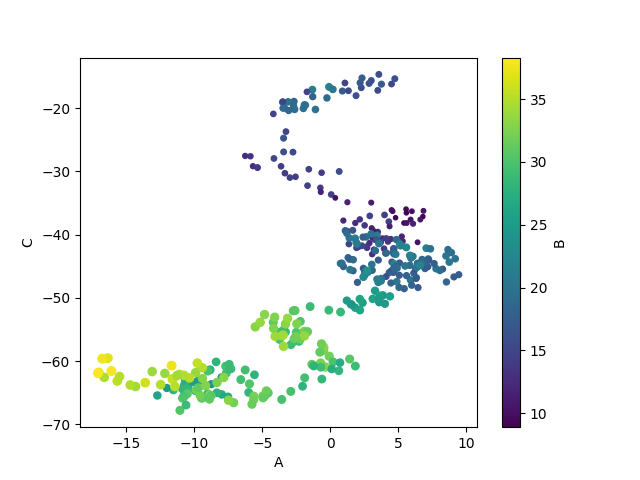

<AxesSubplot:xlabel='A', ylabel='C'>

In [10]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


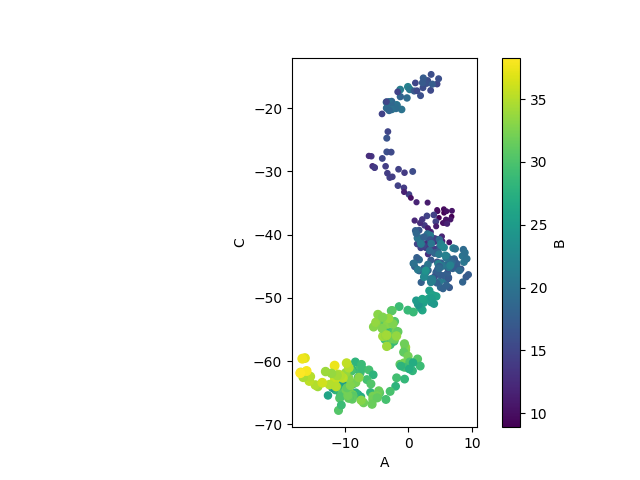

In [11]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


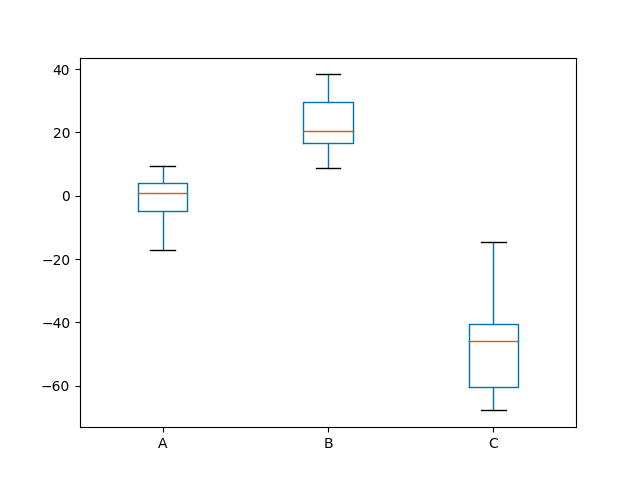

In [12]:
df.plot.box();

<IPython.core.display.Javascript object>


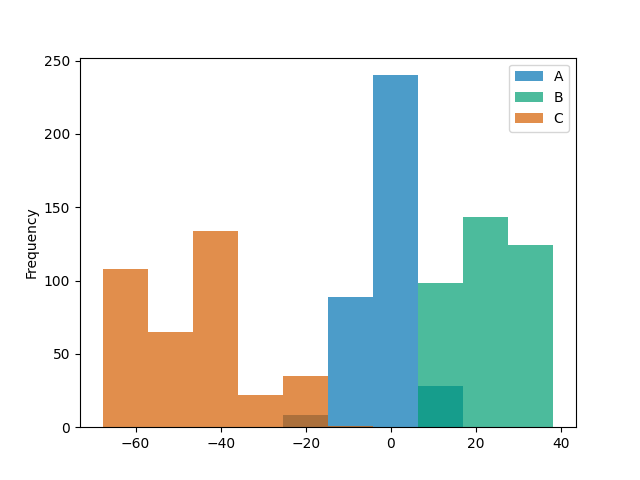

In [13]:
df.plot.hist(alpha=0.7);

Kernel density estimation plots are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


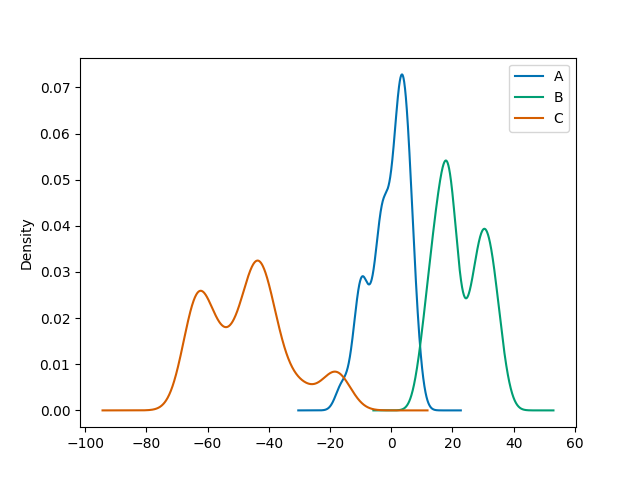

In [15]:
df.plot.kde();

### pandas.tools.plotting

In [16]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


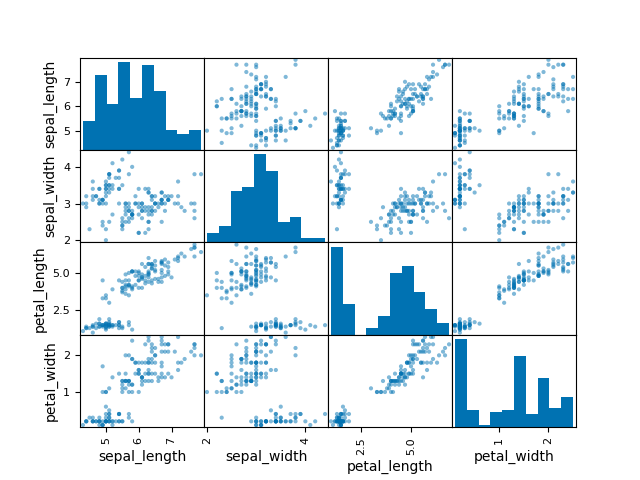

In [20]:
pd.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


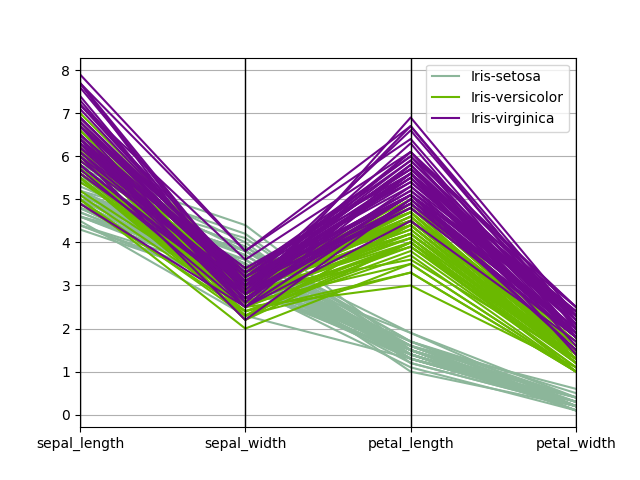

In [24]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'species');

# Seaborn

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [29]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


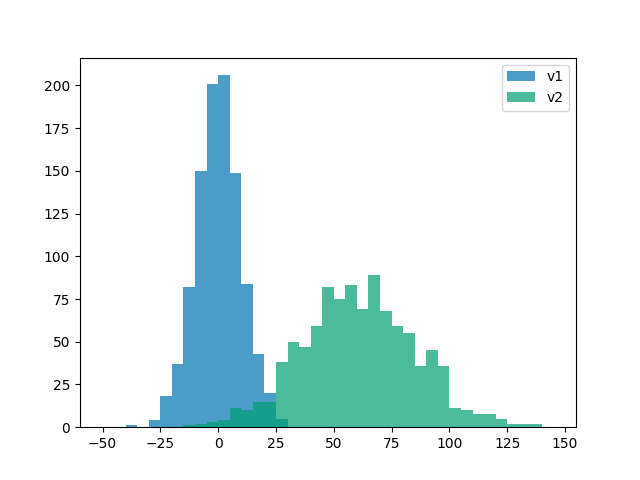

In [34]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

<IPython.core.display.Javascript object>


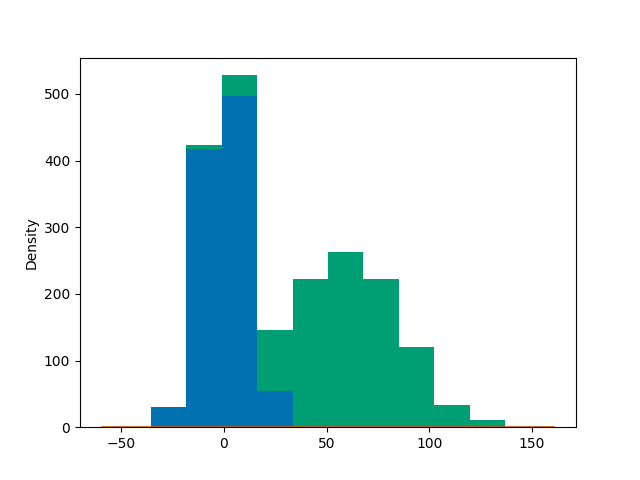

In [32]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked');
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


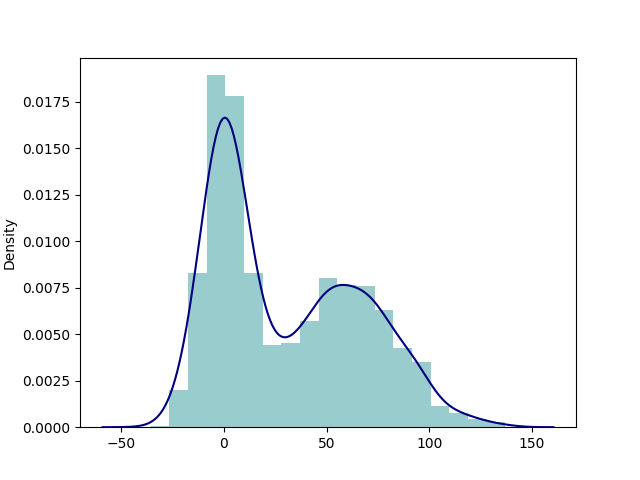

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [35]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


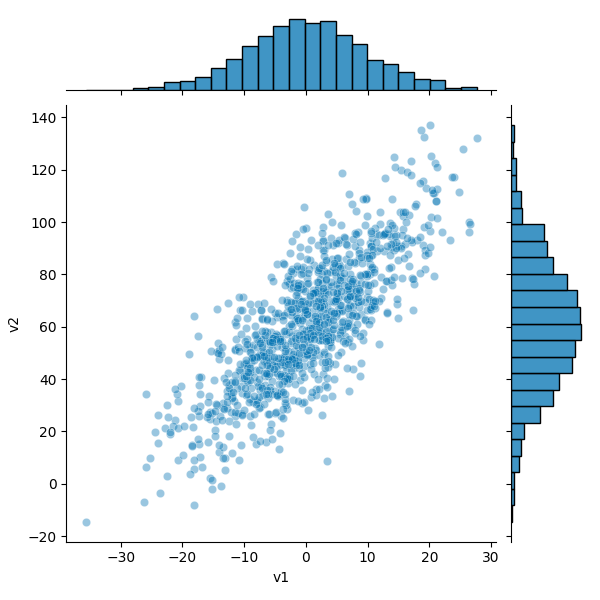

In [37]:
sns.jointplot(x=v1, y=v2, alpha=0.4);

<IPython.core.display.Javascript object>


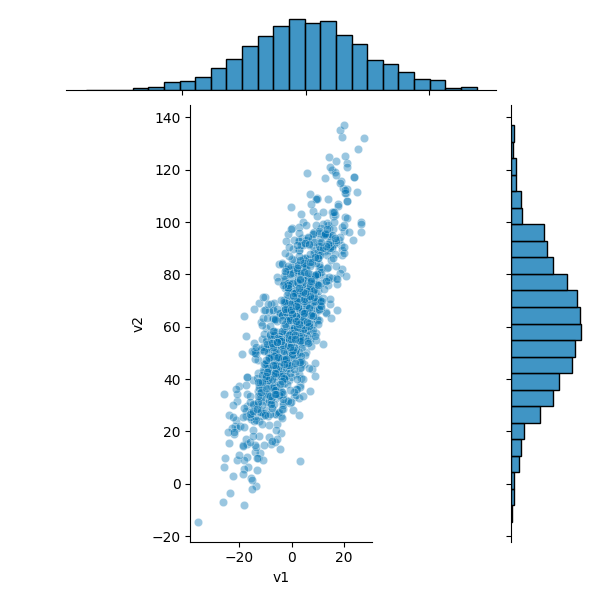

In [38]:
grid = sns.jointplot(x=v1, y=v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


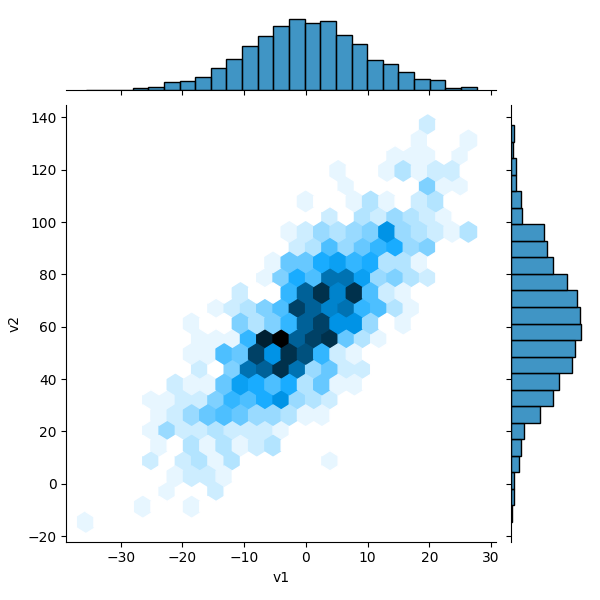

In [40]:
sns.jointplot(x=v1, y=v2, kind='hex');

<IPython.core.display.Javascript object>


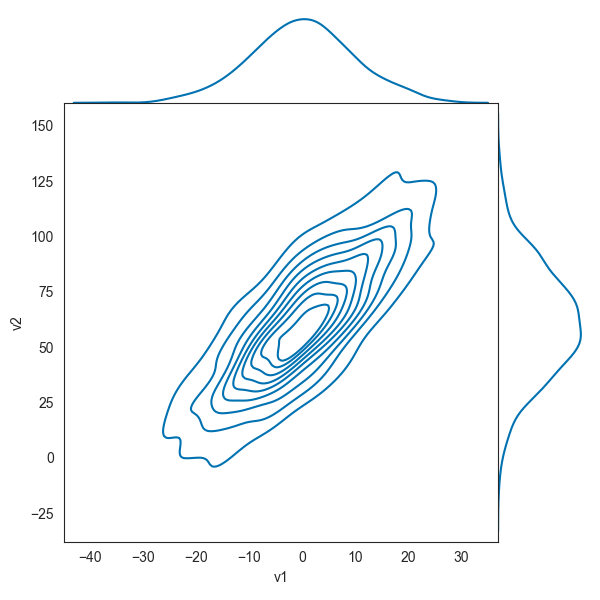

In [41]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(x=v1, y=v2, kind='kde', space=0);

In [42]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


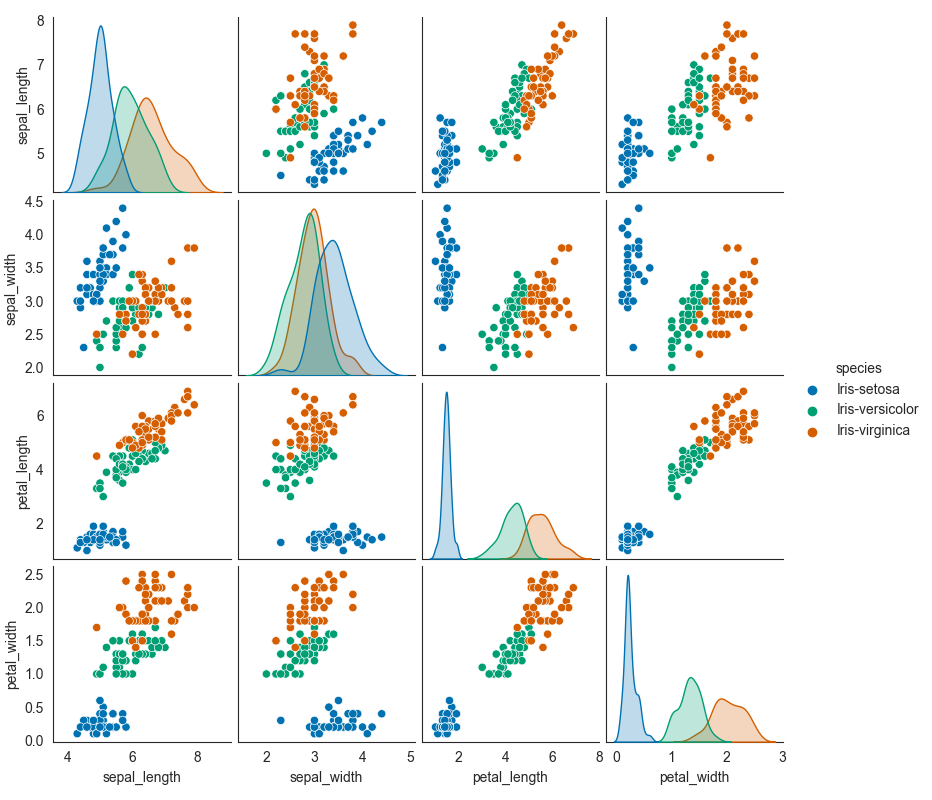

In [45]:
sns.pairplot(iris, hue='species', diag_kind='kde', height=2);

<IPython.core.display.Javascript object>


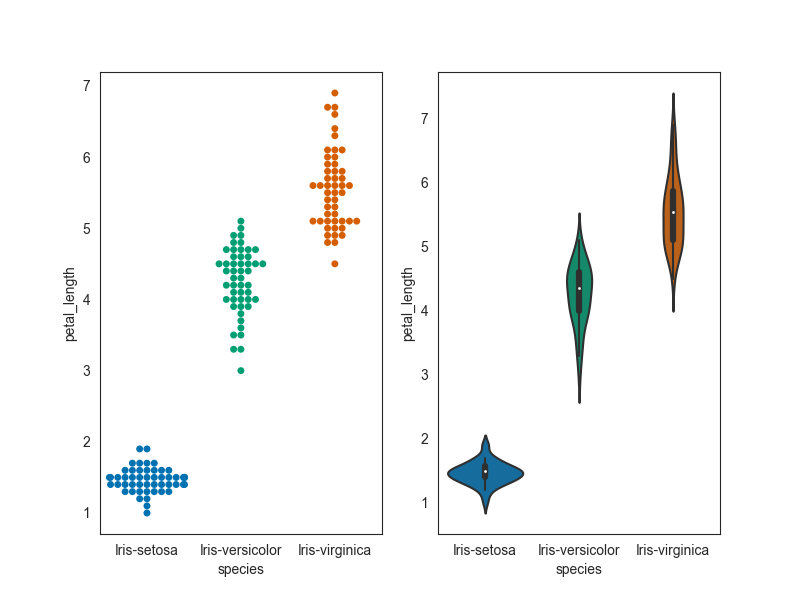

c:\users\sohal\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [47]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot(x='species',y= 'petal_length', data=iris);
plt.subplot(122)
sns.violinplot(x='species', y='petal_length', data=iris);